ResNet 18

In [1]:
#Imports
import torch.nn as nn
import torchvision
from torchvision import models
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.optim import lr_scheduler
import warnings
warnings.filterwarnings("ignore")

Class Counter: 4
Class Names: ['DEER', 'FOX', 'SQUIRREL', 'WOLF']
Device: cuda


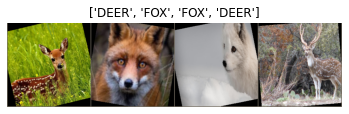

In [2]:
from ipynb.fs.full.main import train_model, test_model, CLASS_COUNTER, device, visualize_model, losses, accuracy_Scores

In [3]:
#Hyperparameter
LEARNING_RATE = 0.001
NUM_EPOCHS = 100

In [4]:
#Konfiguration Restnet
resnet18 = models.resnet18(pretrained=True)
num_ftrs = resnet18.fc.in_features

resnet18.fc = nn.Linear(num_ftrs, CLASS_COUNTER)
resnet18 = resnet18.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr=LEARNING_RATE)

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Epoch 0/99
----------
[TRAIN] Loss: 1.0662 Acc: 0.5826 F1-Score: 0.1415 Precision: 0.1909 Recall: 0.1466
[VALID] Loss: 0.5491 Acc: 0.8028 F1-Score: 0.1936 Precision: 0.2225 Recall: 0.2007

Epoch 1/99
----------
[TRAIN] Loss: 0.7440 Acc: 0.7464 F1-Score: 0.1867 Precision: 0.2232 Recall: 0.1866
[VALID] Loss: 0.2698 Acc: 0.9420 F1-Score: 0.2340 Precision: 0.2418 Recall: 0.2355

Epoch 2/99
----------
[TRAIN] Loss: 0.6272 Acc: 0.7698 F1-Score: 0.1977 Precision: 0.2356 Recall: 0.1925
[VALID] Loss: 0.1757 Acc: 0.9613 F1-Score: 0.2394 Precision: 0.2454 Recall: 0.2403

Epoch 3/99
----------
[TRAIN] Loss: 0.5490 Acc: 0.8114 F1-Score: 0.2102 Precision: 0.2413 Recall: 0.2038
[VALID] Loss: 0.1528 Acc: 0.9588 F1-Score: 0.2388 Precision: 0.2446 Recall: 0.2397

Epoch 4/99
----------
[TRAIN] Loss: 0.4924 Acc: 0.8296 F1-Score: 0.2143 Precision: 0.2417 Recall: 0.2074
[VALID] Loss: 0.1242 Acc: 0.9613 F1-Score: 0.2394 Precision: 0.2453 Recall: 0.2403

Epoch 5/99
----------
[TRAIN] Loss: 0.4647 Acc: 0.8270 

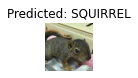

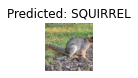

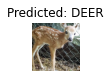

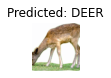

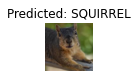

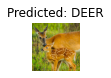

In [5]:
#Training
base_model = train_model(resnet18,"resnet", criterion, optimizer, step_lr_scheduler, NUM_EPOCHS)
visualize_model(base_model)
plt.show()

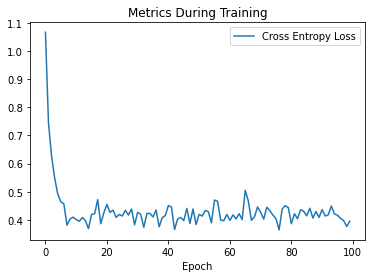

In [17]:
#Plotten
plt.plot(losses, label = "Cross Entropy Loss")
#plt.plot(accuracy_Scores, label = "Accuracy")
plt.grid(color='k', linestyle='-', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.legend()
plt.title('Metrics During Training');

In [18]:
base_model = test_model(base_model, criterion)

[TEST] Loss: 0.1145 Acc: 0.9693 F1-Score: 0.2447 Precision: 0.2494 Recall: 0.2437
Test complete in 0m 5s
